#**PRAKTIKUM 04 - MACHINE LEARNING**

Nama : Imelda Wahyuni

Nim : 0110222042

Sesi : Pagi

#**Logistic Regression**

**1. Import Library**

Tahap pertama melakukan import libary, guna untuk mempermudah proses membuat sebuah model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

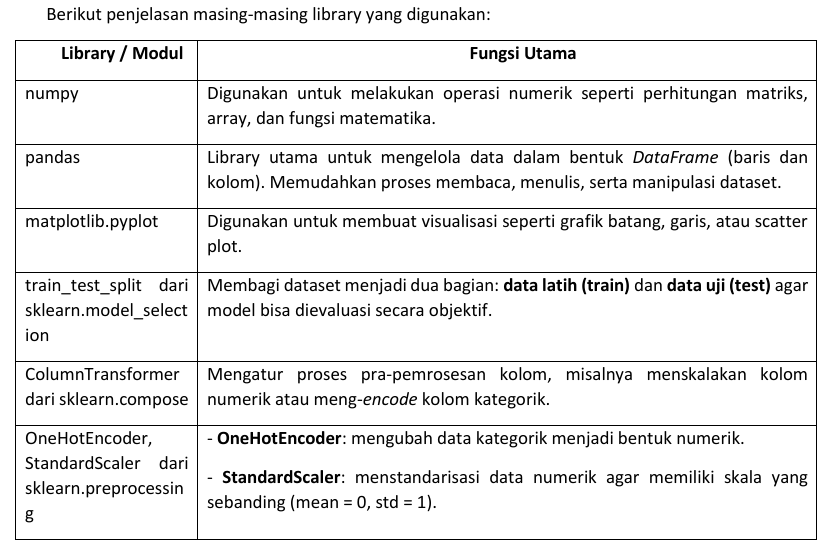

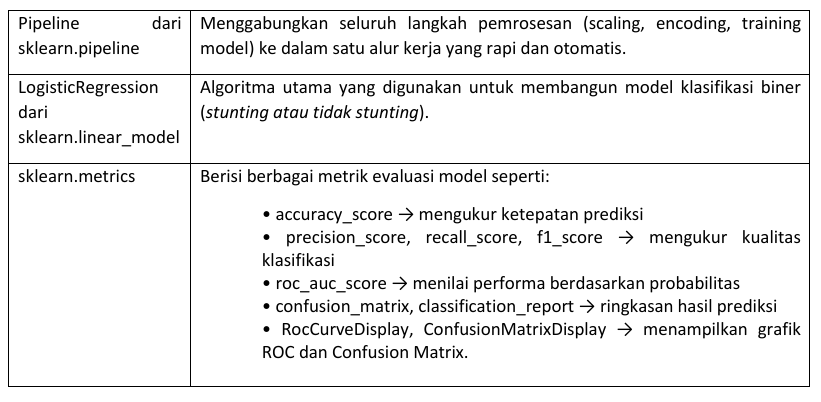

**2. Menghubungkan Colab dengan Drive**

Kode di bawah ini untuk menghubungkan colab dengan drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Memanggil path folder yang akan digunakan

In [3]:
path = "/content/gdrive/MyDrive/SEMESTER 7/Machine Learning/praktikum04"

**3. Load data dan membaca file csv**

Selanjutnya, kode menggunakan library Pandas untuk membaca data dari file. Variabel path berisi lokasi folder di Google Drive tempat file stunting_wasting_dataset.csv disimpan. Lalu, fungsi pd.read_csv() dipakai untuk membaca file CSV tersebut dan menyimpannya ke dalam DataFrame, sehingga datanya bisa diproses lebih lanjut.

In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/SEMESTER 7/Machine Learning/praktikum04/data/stunting_wasting_dataset.csv")
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


**4. Melihat informasi umum dataset**

Kode df info ini untum melihat informasi yang ada pada dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


Terdapat 3 type data dari 5 kolom, floast (2), int (1) dan object (3)

**5. Data Pre-processing**

Tahap selanjutnya yaitu melakukan data pre-processing yaitu pembersihan data, muladi dari mengecek apakah ada data yang hilang, duplikat data, mengecek nilai unik, sampai mapping kolom kategorik ke bentuk numerik dan menganalisis korelasi antar variabel numerik hingga visua;isasi heatmap korelasi matriks.

**5.1 Cek Missing Value**

Kode di bawah ini adalah mengecekan missing value, apakah terdapat nilai yang kotor atau tidak.

In [6]:
# cek missing value
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


Terlihat ya pada hasil di atas, bahwa tidak ada nilai yang hilang, kotor ataupun yang lainnya. Dataset stunting ini sudah bersih.

Kode di bawah ini yaitu untuk mengecek apakah ada duplikat data

In [7]:
# Mengecek apakah ada duplikat data
df.duplicated().sum()

np.int64(7308)

Dari hasil pengecekan, terdapat duplikat data sebagai 7308.

Menghapus data duplikat

In [8]:
df = df.drop_duplicates()

Mengecek ulang apakah masih ada data duplikat apa tidak setelah berhasil di hapus.

In [9]:
# Mengecek apakah ada duplikat data
df.duplicated().sum()

np.int64(0)

Data sudah berhasil dibersihkan, tidak ada missing value, tidak ada pula duplikat data.

**5.2 Cek Nilai Unik**

Mengecek nilai unik pada kolom Stunting, di sini terdapa 4 kategori nilai unik yaitu ada Tall, Stunted, Normal, dan Severely Stunted.

In [10]:
df['Stunting'].unique()

array(['Tall', 'Stunted', 'Normal', 'Severely Stunted'], dtype=object)

Mengecek nilai unik pada kolom jenis kelamin, d =i sini ada 2 jenis kelamin yaitu laki-laki dan perempuan

In [11]:
df['Jenis Kelamin'].unique()

array(['Laki-laki', 'Perempuan'], dtype=object)

**5.3 Mapping Kolom Kategorik ke Bentuk Numerik**

In [12]:
# 1. Mapping kolom STuntinng -> biner
map_stunt = {'Stunted': 1, 'Severely Stunted': 1, 'Normal': 0, 'Tall': 0, 'Very Tall': 0, np.nan: np.nan}

# Handle potential missing values in 'Stunting' before mapping and map
df['Stunting_bin'] = df['Stunting'].map(map_stunt)

# 2. Mapping kolom Jenis Kelamin -> biner
# Laki-laki = 1, Perempuan = 0
df['JK_bin'] = (df['Jenis Kelamin'] == 'Laki-laki').astype(int)

print("Distribusi Stunting_bin\n", df['Stunting_bin'].value_counts(dropna=False))
print("\nDistribusi JK_bin:\n", df['JK_bin'].value_counts())

Distribusi Stunting_bin
 Stunting_bin
0.0    72320
1.0    20372
Name: count, dtype: int64

Distribusi JK_bin:
 JK_bin
1    46353
0    46339
Name: count, dtype: int64


Kode di atas berfungsi untuk mengonversi nilai teks menjadi bentuk numerik agar dapat diproses oleh model.

• Kolom Stunting_bin digunakan sebagai variabel target (Y).

• Kolom JK_bin digunakan sebagai variabel fitur (X) tambahan.

• Hasil distribusi data menunjukkan:

 – Stunting_bin: terdapat 78.021 data kategori tidak stunting (0) dan 21.979 data kategori stunting (1).

 – JK_bin: terdiri atas 50.179 data laki-laki (1) dan 49.821 data perempuan (0).

• Berdasarkan distribusi tersebut, data antara jenis kelamin tergolong seimbang, sedangkan proporsi kelas stunting relatif lebih sedikit dibandingkan dengan kelas tidak stunting.

**5.4 Analisis Korelasi Antar Variabel Numerik**

Fungsi corr() digunakan untuk menghitung korelasi Pearson antara setiap variabel numerik terhadap
target Stunting_bin.

In [13]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting_bin,JK_bin
Umur (bulan),1.000000,0.874162,0.659566,0.037173,0.000636
Tinggi Badan (cm),0.874162,1.000000,0.618453,-0.288216,0.070159
Berat Badan (kg),0.659566,0.618453,1.000000,0.020676,0.043446
Stunting_bin,0.037173,-0.288216,0.020676,1.000000,-0.005187
JK_bin,0.000636,0.070159,0.043446,-0.005187,1.000000


Nilai korelasi berkisar antara -1 hingga 1:

• Nilai mendekati 1 → hubungan positif kuat (naik bersama)

• Nilai mendekati -1 → hubungan negatif kuat (berlawanan arah)

• Nilai mendekati 0 → hubungan lemah atau tidak ada hubungan

**5.5 Visualisasi Heatmap Korelasi**

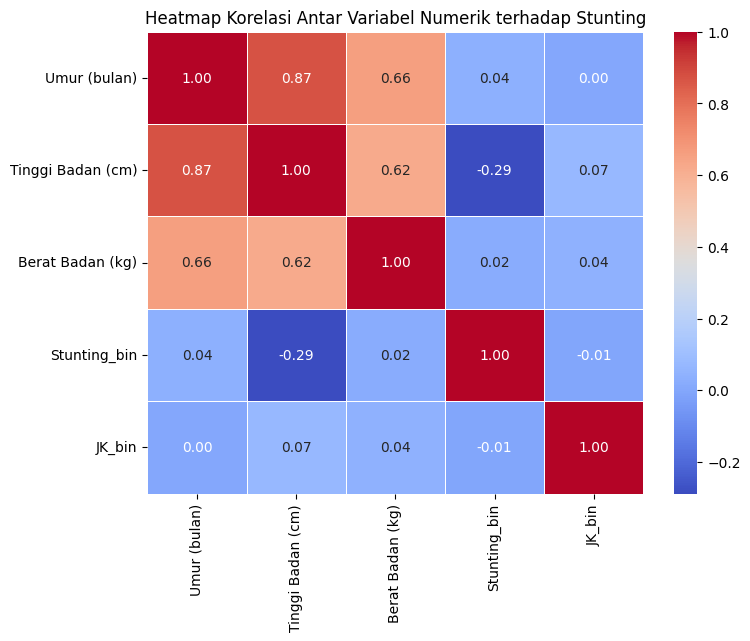

In [14]:
# Visualisasi heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel Numerik terhadap Stunting', fontsize=12)
plt.show()

Visualisasi heatmap korelasi digunakan untuk melihat hubungan antar variabel numerik secara
menyeluruh dalam dataset. Dengan heatmap, kita dapat mengetahui variabel mana yang memiliki
korelasi kuat, sedang, atau lemah, serta arah hubungannya (positif atau negatif) terhadap variabel
target Stunting_bin

**6. Pembagian Dataset (Training dan Testing)**

Sebelum model dilatih, dataset harus dibagi menjadi dua bagian utama, yaitu:

• Data Latih (Training Set) — digunakan untuk melatih model agar dapat mengenali pola pada data.

• Data Uji (Testing Set) — digunakan untuk mengukur kemampuan generalisasi model terhadap data baru yang belum pernah dilihat.

**6.1 Menentukan Fitur dan Target**

In [15]:
# Fitur numerik dan gender
feature_num = ['Umur (bulan)', 'Tinggi Badan (cm)', 'Berat Badan (kg)']
feature_bin = ['JK_bin']

# Gabungkan & drop missing
use_cols = feature_num + feature_bin + ['Stunting_bin']
df_model = df[use_cols].dropna(subset=['Stunting_bin']).copy()

X = df_model[feature_num + feature_bin]
y = df_model['Stunting_bin']

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (92692, 4)
y shape: (92692,)


Variabel X berisi fitur atau variabel independen (Umur, Tinggi Badan, Berat Badan, dan Jenis Kelamin). Variabel y berisi variabel target yaitu Stunting_bin.

Hasil menunjukkan ukuran dataset:

• X shape: (100000, 4) → terdapat 100.000 data dengan 4 fitur.

• y shape: (100000,) → 100.000 label target.

**6.2 Membagi Dataset menjadi Training dan Testing Set**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)

Data latih: (74153, 4)
Data uji: (18539, 4)


Fungsi train_test_split() digunakan untuk membagi dataset menjadi dua bagian, yaitu:

• 80% data (sebanyak 80.000 baris) digunakan sebagai data latih (X_train, y_train) untuk membangun model.

• 20% data (sebanyak 20.000 baris) digunakan sebagai data uji (X_test, y_test) untuk mengevaluasi kinerja model.

Parameter stratify = y berfungsi untuk menjaga agar proporsi kelas stunting dan tidak stunting tetap seimbang pada kedua subset (train dan test). Sementara itu, parameter random_state = 42 digunakan untuk memastikan hasil pembagian data tetap konsisten setiap kali kode dijalankan (reproducible).

**7. Pembangunan Model Logistic Refression**

In [17]:
# Scale hanya fitur numerik, gender Langsung passthrough
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
        ('bin', 'passthrough', feature_bin)
    ],
    remainder='drop'
)

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

clf = Pipeline([
    ('preprocess', preprocess),
    ('model', model)
])

# Latih model
clf.fit(X_train, y_train)
print("✅Model Logistic Regression telah dilatih")

✅Model Logistic Regression telah dilatih


Fungsi ColumnTransformer() digunakan untuk melakukan scaling pada fitur numerik (Umur, Tinggi Badan, dan Berat Badan) agar seluruh fitur memiliki skala yang seragam.

● Kolom JK_bin (representasi gender 0/1) dibiarkan dengan opsi passthrough karena sudah dalam bentuk numerik biner.

● Model LogisticRegression() digunakan sebagai algoritma klasifikasi dengan beberapa parameter utama:

 – max_iter = 1000: memastikan proses pelatihan berjalan cukup lama hingga model mencapai konvergensi.

 – solver = 'lbfgs': metode optimisasi yang efisien untuk dataset berukuran besar.

 – class_weight = 'balanced': memberikan bobot seimbang pada kelas minoritas (stunting = 1) agar model tidak bersifat bias.

 – random_state = 42: menjaga konsistensi hasil pelatihan (reproducibility).

● Objek Pipeline() digunakan untuk mengintegrasikan seluruh proses preprocessing dan pemodelan ke dalam satu alur kerja yang sistematis.

● Model kemudian berhasil dilatih menggunakan data latih sebanyak 80.000 baris.

**8. Prediksi Model dan Evaluasi Model**

In [18]:
# Prediksi & Probabilitas
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Hitung metrik
print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

Akurasi: 0.9063
Precision: 0.7139
Recall: 0.9571
F1 Score: 0.8178
ROC AUC Score: 0.9651


Fungsi predict() digunakan untuk menghasilkan label klasifikasi, yaitu 0 (tidak stunting) atau 1 (stunting).
Fungsi predict_proba() memberikan output berupa probabilitas kemungkinan seorang anak mengalami stunting.

Metrik evaluasi yang digunakan untuk menilai kinerja model meliputi:

Accuracy (Akurasi) = 0.9055, menunjukkan bahwa model mampu memberikan prediksi yang benar pada 90,55% data uji.

Precision = 0.7152, artinya dari seluruh prediksi stunting yang dihasilkan model, 71,52% merupakan prediksi yang benar.

Recall = 0.9472, berarti model berhasil mendeteksi 94,72% dari seluruh kasus stunting yang sebenarnya.

F1-Score = 0.8146, menggambarkan keseimbangan antara nilai precision dan recall.

ROC-AUC = 0.947, menunjukkan performa keseluruhan model yang tergolong sangat baik dalam membedakan antara kelas stunting dan tidak stunting.

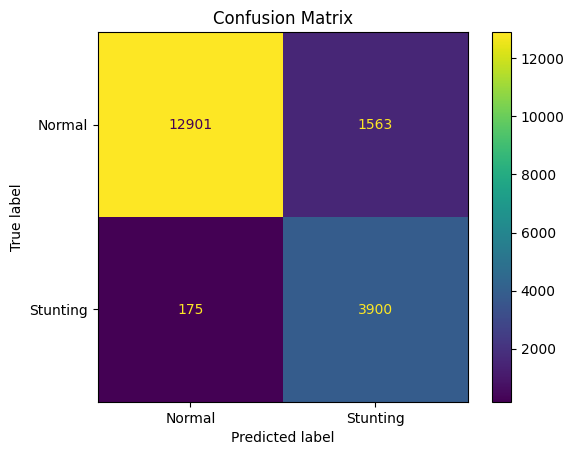

In [19]:
# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                        display_labels=['Normal', 'Stunting']
                        ).plot(values_format='d')
plt.title("Confusion Matrix")
plt.show()

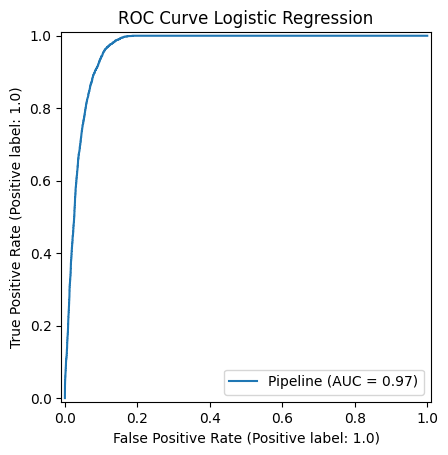

In [20]:
# ROC Curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve Logistic Regression")
plt.show()

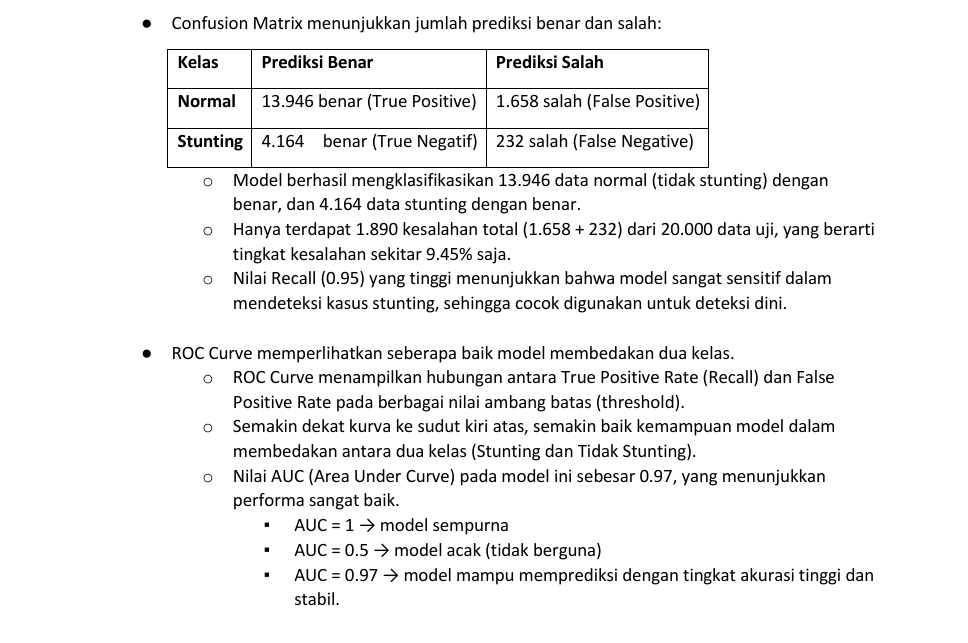

**9. Classification Report**

In [21]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["Tidak Stunting (0)", "Stunting (1)"]))

                    precision    recall  f1-score   support

Tidak Stunting (0)       0.99      0.89      0.94     14464
      Stunting (1)       0.71      0.96      0.82      4075

          accuracy                           0.91     18539
         macro avg       0.85      0.92      0.88     18539
      weighted avg       0.93      0.91      0.91     18539



Classification Report merupakan salah satu metode evaluasi yang digunakan untuk menilai kinerja model klasifikasi, seperti Logistic Regression.
Laporan ini menampilkan sejumlah metrik utama, yaitu:

- Precision – mengukur proporsi prediksi positif yang benar dari seluruh prediksi positif yang dihasilkan model.

- Recall (Sensitivitas) – menunjukkan proporsi data positif sebenarnya yang berhasil dikenali oleh model.

- F1-Score – merepresentasikan keseimbangan antara precision dan recall.

- Support – menunjukkan jumlah data aktual pada masing-masing kelas (0 atau 1).

Laporan ini memberikan gambaran mengenai sejauh mana model mampu menjaga  keseimbangan performa dalam mendeteksi data positif (Stunting) dan negatif (Tidak Stunting).

Hasil Analisis:

- Precision (Stunting) = 0.72 → dari seluruh anak yang diprediksi stunting, 72% benar-benar stunting.

- Recall (Stunting) = 0.95 → dari seluruh anak yang benar-benar stunting, 95% berhasil terdeteksi oleh model.

- F1-Score = 0.82 → menunjukkan kombinasi yang seimbang antara precision dan recall.

- Accuracy = 0.91 (91%) → model menghasilkan prediksi yang benar untuk 91% data uji.

Macro Average dan Weighted Average → keduanya merepresentasikan nilai rata-rata dari setiap metrik, dengan weighted average mempertimbangkan proporsi jumlah data pada masing-masing kelas.

**10. Classification Report**

In [22]:
from sklearn.model_selection import cross_val_score

# Lakukan cross validation (cv=5 berarti 5-fold)
scores = cross_val_score(clf, X, y, cv=5)

# Tampilkan hasil
print("Skor tiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))
print("Standar deviasi:", np.std(scores))

Skor tiap fold: [0.9084093  0.90414801 0.90468227 0.90673212 0.9028482 ]
Rata-rata akurasi: 0.9053639814725255
Standar deviasi: 0.001970695381359219


Kode:
cross_val_score(clf, X, y, cv=5)

Proses:
- Dataset dibagi menjadi 5 fold.

- 4 fold → data latih, 1 fold → data uji.

- Proses diulang 5 kali, tiap fold bergantian menjadi data uji.

- np.mean(scores) → rata-rata akurasi.

- np.std(scores) → standar deviasi (stabilitas model).

Hasil Validasi

- Akurasi per fold: 0.899 – 0.906

- Rata-rata akurasi: 0.9023 (90.23%)

- Standar deviasi: 0.0028 → hasil sangat stabil

- Model Logistic Regression menunjukkan:

- Performa tinggi dan konsisten

- Tidak overfitting

- Mampu menggeneralisasi dengan baik

**11. Interprestasi Model Logistic Regression**

In [23]:
# Ambil nama fitur & koefisien
feat_names = feature_num + feature_bin
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Fitur': feat_names,
    'Koefisien (log-odds)': coefs,
    'Odds Ratio (e^coef)': odds
}).sort_values('Odds Ratio (e^coef)', ascending=False)

display(coef_df)

,Fitur,Koefisien (log-odds),Odds Ratio (e^coef)
0,Umur (bulan),8.661420,5775.733054
3,JK_bin,1.726339,5.620042
2,Berat Badan (kg),0.653153,1.921590
1,Tinggi Badan (cm),-10.742834,0.000022


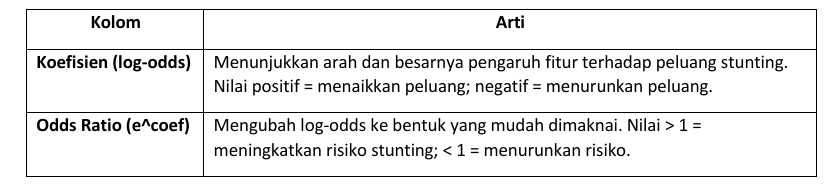

**12. Prediksi Data baru**

In [24]:
# Contoh 2 anak
data_baru = pd.DataFrame({
    'Umur (bulan)': [24, 10],
    'Tinggi Badan (cm)':[79.0, 72.5],
    'Berat Badan (kg)': [9.2, 7.8],
    'JK_bin': [1, 0] # 1 = laki-laki, 0 = perempuan
})

# Prediksi
pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:,1]

hasil = data_baru.copy()
hasil['Prob_Stunting'] = prob
hasil['Pred (0=Tidak, 1=Ya)'] = pred
display(hasil)

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),JK_bin,Prob_Stunting,"Pred (0=Tidak, 1=Ya)"
0,24,79.0,9.2,1,0.998346,1.0
1,10,72.5,7.8,0,0.001810,0.0


Interpretasi Hasil

Anak ke-1

● Umur: 24 bulan, tinggi badan: 79 cm, berat: 9.2 kg, jenis kelamin: laki-laki.

● Probabilitas stunting = 0.9982 (≈ 99.8%), sehingga diprediksi Stunting (1).

● Interpretasi: sesuai logika — karena anak usia 2 tahun (24 bulan) dengan tinggi badan 79 cm tergolong lebih pendek dari normal, model mendeteksi kemungkinan stunting sangat tinggi.

Anak ke-2

● Umur: 10 bulan, tinggi badan: 72.5 cm, berat: 7.8 kg, jenis kelamin: perempuan.

● Probabilitas stunting = 0.0021 (≈ 0.2%), sehingga diprediksi Tidak Stunting (0).

● Interpretasi: masuk akal juga — tinggi badan 72.5 cm untuk usia 10 bulan masih termasuk rentang normal, sehingga model memprediksi tidak stunting.